## DSP Homework 2
### Noise Reduction using Averaging / Ensemble Method
Problem Description:

Objective: Reduce noise in repeated EEG/biological signals using averaging (ensemble) method.

Method: Multiple noisy measurements are averaged to reduce random noise while preserving the signa

Tasks:

 1. Center the signals (zero mean)

 2. Compute point-wise average (ensemble)

 3. Compute noise for each signal

 4. Compute SNR for each signal and for the averaged signal

 5. Present results in a table

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Define Signals

In [2]:
O = np.array([0.0, 0.1, 0.4, 0.8, 1.2, 0.9, 0.5, 0.2, 0.1, 0.0])
A = np.array([0.1, 0.2, 0.5, 0.9, 1.3, 1.0, 0.4, 0.2, -0.1, 0.1])
B = np.array([0.1, 0.0, 0.3, 0.7, 1.0, 0.8, 0.6, 0.3, 0.2, 0.1])
C = np.array([0.1, 0, 0.4, 0.9, 1.4, 1.1, 0.5, 0.2, 0.0, -0.1])

### Center Signals (Zero Mean)

In [3]:
O_centered = O - np.mean(O)
A_centered = A - np.mean(A)
B_centered = B - np.mean(B)
C_centered = C - np.mean(C)

print("Centered signals (first 5 samples):")
print("O:", np.round(O_centered[:5],1))
print("A:", np.round(A_centered[:5],1))
print("B:", np.round(B_centered[:5],1))
print("C:", np.round(C_centered[:5],1))

Centered signals (first 5 samples):
O: [-0.4 -0.3 -0.   0.4  0.8]
A: [-0.4 -0.3  0.   0.4  0.8]
B: [-0.3 -0.4 -0.1  0.3  0.6]
C: [-0.4 -0.5 -0.1  0.4  0.9]


### Averaging / Ensemble Method

In [4]:
ensemble_signal = (A_centered + B_centered + C_centered) / 3

print("Ensemble signal (first 5 samples):")
print(np.round(ensemble_signal[:5],1))

Ensemble signal (first 5 samples):
[-0.3 -0.4 -0.   0.4  0.8]


### Compute Noise for Each Signal:
Noise is defined as difference from original signal O

In [5]:
noise_A = A_centered - O_centered
noise_B = B_centered - O_centered
noise_C = C_centered - O_centered
noise_ensemble = ensemble_signal - O_centered

### Visualizing Noise

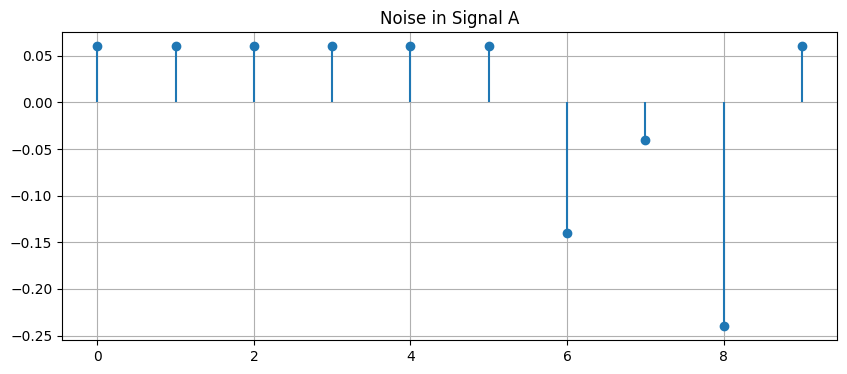

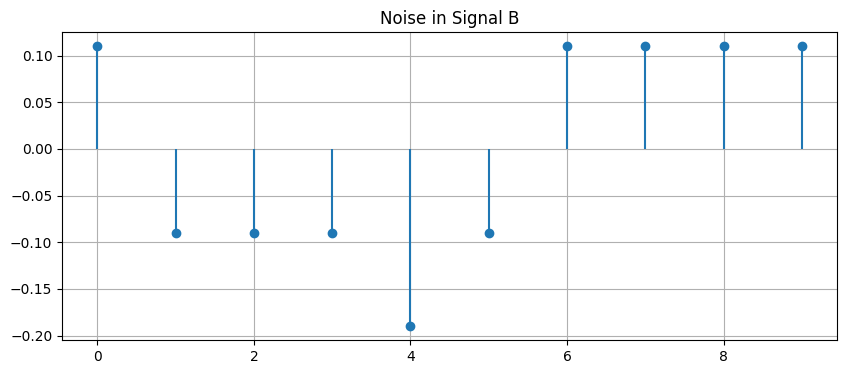

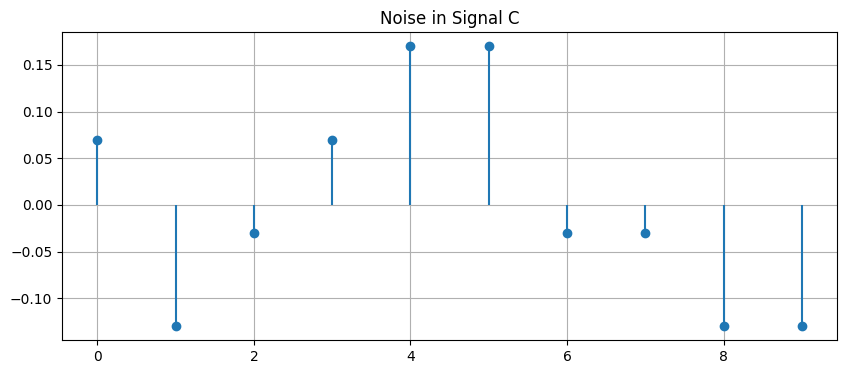

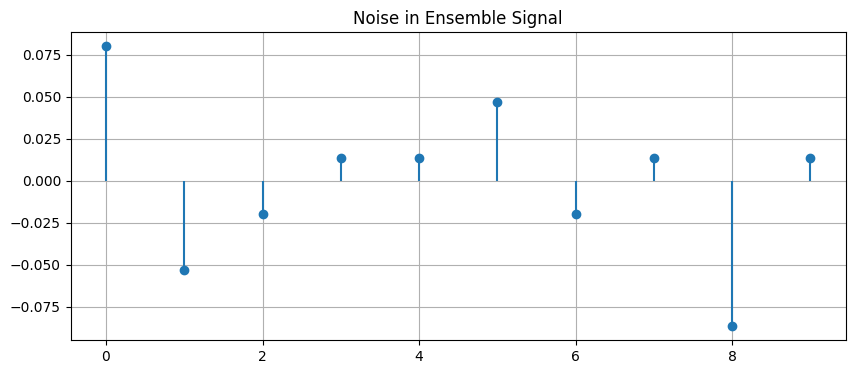

In [6]:
plt.figure(figsize=(10,4))
plt.stem(noise_A, basefmt=" ")
plt.title("Noise in Signal A")
plt.grid()
plt.show()

plt.figure(figsize=(10,4))
plt.stem(noise_B, basefmt=" ")
plt.title("Noise in Signal B")
plt.grid()
plt.show()

plt.figure(figsize=(10,4))
plt.stem(noise_C, basefmt=" ")
plt.title("Noise in Signal C")
plt.grid()
plt.show()

plt.figure(figsize=(10,4))
plt.stem(noise_ensemble, basefmt=" ")
plt.title("Noise in Ensemble Signal")
plt.grid()
plt.show()

### Compute SNR

In [7]:
def compute_snr(signal, noise):
    return np.var(signal) / np.var(noise)

snr_A = compute_snr(A_centered, noise_A)
snr_B = compute_snr(B_centered, noise_B)
snr_C = compute_snr(C_centered, noise_C)
snr_ensemble = compute_snr(ensemble_signal, noise_ensemble)

print("SNRs:")
print("Signal A:", round(snr_A,2))
print("Signal B:", round(snr_B,2))
print("Signal C:", round(snr_C,2))
print("Ensemble:", round(snr_ensemble,2))

SNRs:
Signal A: 18.31
Signal B: 8.13
Signal C: 20.04
Ensemble: 82.91


### Final Table of Results

In [8]:
results = pd.DataFrame({
    "Signal": ["A", "B", "C", "Ensemble"],
    "Noise Std Dev": [round(np.std(noise_A),1),
                      round(np.std(noise_B),1),
                      round(np.std(noise_C),1),
                      round(np.std(noise_ensemble),1)],
    "SNR": [round(snr_A,2), round(snr_B,2), round(snr_C,2), round(snr_ensemble,2)]
})

results

,Signal,Noise Std Dev,SNR
0,A,0.1,18.31
1,B,0.1,8.13
2,C,0.1,20.04
3,Ensemble,0.0,82.91


### Time-Domain Comparison

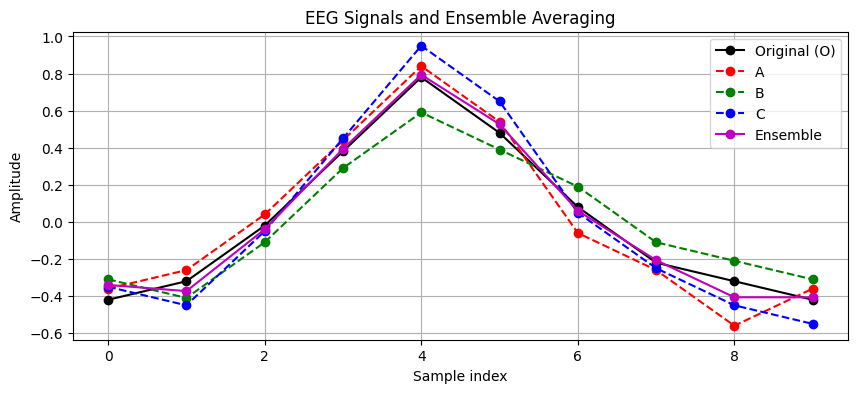

In [9]:
plt.figure(figsize=(10,4))
plt.plot(O_centered, 'k-o', label='Original (O)')
plt.plot(A_centered, 'r--o', label='A')
plt.plot(B_centered, 'g--o', label='B')
plt.plot(C_centered, 'b--o', label='C')
plt.plot(ensemble_signal, 'm-o', label='Ensemble')
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.title("EEG Signals and Ensemble Averaging")
plt.legend()
plt.grid()
plt.show()

### Interpretation
- Averaging multiple noisy repetitions of the signal reduces random noise.

- Noise standard deviation is reduced in the ensemble signal compared to individual signals.

- SNR increases after ensemble averaging, confirming improved signal quality.

- This is consistent with the theory: random noise cancels out when averaging independent measurements.